In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [69]:
df=pd.read_csv("training_set.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             599 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          613 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    612 non-null    float64
 7   CoapplicantIncome  613 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(5), object(8)
memory usage: 62.5+ KB


In [70]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,NaN,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y


In [71]:
df.isna().sum()

Loan_ID               0
Gender               15
Married               3
Dependents           15
Education             1
Self_Employed        32
ApplicantIncome       2
CoapplicantIncome     1
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
property_Area         0
Loan_Status           0
dtype: int64

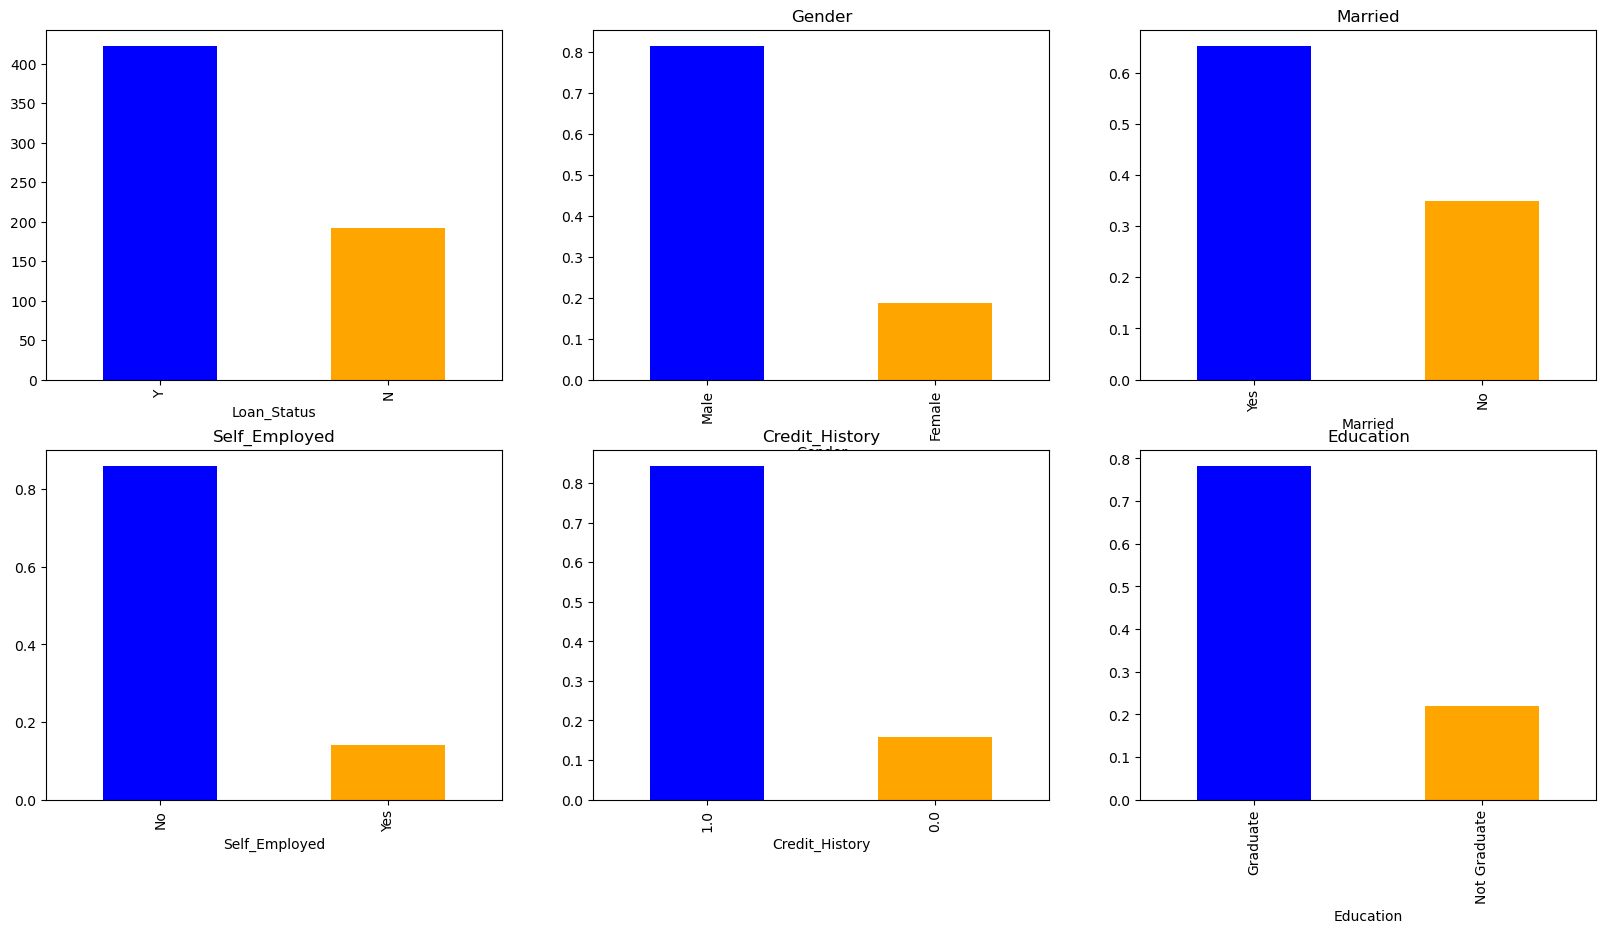

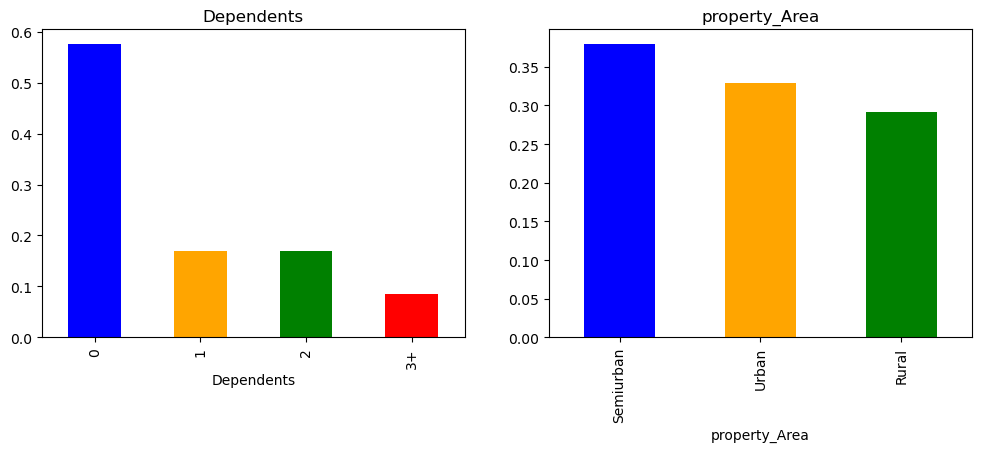

In [72]:
colors = ['blue','orange','green','red']
plt.subplot(231)
df['Loan_Status'].value_counts().plot.bar(color=colors)

plt.subplot(232)
df['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'Gender',color=colors)

plt.subplot(233)
df['Married'].value_counts(normalize=True).plot.bar(title= 'Married',color=colors)

plt.subplot(234)
df['Self_Employed'].value_counts(normalize=True).plot.bar(title= 'Self_Employed',color=colors)

plt.subplot(235)
df['Credit_History'].value_counts(normalize=True).plot.bar(title= 'Credit_History',color=colors)

plt.subplot(236)
df['Education'].value_counts(normalize=True).plot.bar(title= 'Education',color=colors)

plt.show()
plt.subplot(121)
df['Dependents'].value_counts(normalize=True).plot.bar(figsize=(12,4), title= 'Dependents',color=colors)

plt.subplot(122)
df['property_Area'].value_counts(normalize=True).plot.bar(title= 'property_Area',color=colors)

plt.show()

In [73]:
df['Loan_ID'] = df['Loan_ID'].str.replace("LP", "", regex=True).astype(int)

In [74]:
df_encoded = pd.get_dummies(df['property_Area'], prefix='property_Area')
df = pd.concat([df, df_encoded], axis=1)
df.rename(columns={'property_Area_Urban': 'Urban', 'property_Area_Rural': 'Rural', 'property_Area_Semiurban': 'Semiurban'}, inplace=True)

In [75]:
df_encoded_gender = pd.get_dummies(df['Gender'], prefix='Gender')
df = pd.concat([df, df_encoded_gender], axis=1)
df.rename(columns={'Gender_Male': 'Male', 'Gender_Female': 'Female'}, inplace=True)

In [76]:
categorical_columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
                       'property_Area', 'Loan_Status','Rural','Urban','Semiurban','Female','Male']

# Convert to numerical
for col in categorical_columns:
    df[col] = df[col].astype('category').cat.codes
df.replace(-1, np.nan, inplace=True)


In [77]:
for col in categorical_columns:
    df[col].fillna(df[col].mode()[0], inplace=True)
df.isna().sum()

C:\Users\Richa\AppData\Local\Temp\ipykernel_39236\437099571.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)
C:\Users\Richa\AppData\Local\Temp\ipykernel_39236\437099571.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exampl

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       2
CoapplicantIncome     1
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
property_Area         0
Loan_Status           0
Rural                 0
Semiurban             0
Urban                 0
Female                0
Male                  0
dtype: int64

In [78]:

num_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']
for col in num_cols:
    df[col].fillna(df[col].median(), inplace=True)

df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)
df.isna().sum()

C:\Users\Richa\AppData\Local\Temp\ipykernel_39236\2929210231.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
C:\Users\Richa\AppData\Local\Temp\ipykernel_39236\2929210231.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
property_Area        0
Loan_Status          0
Rural                0
Semiurban            0
Urban                0
Female               0
Male                 0
dtype: int64

In [79]:
df['Total_Income'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df['Loan_Income_Ratio'] = df['LoanAmount'] / df['Total_Income']
df['EMI'] = df['LoanAmount'] / df['Loan_Amount_Term']
df['Balance_Income'] = df['Total_Income'] - df['EMI']


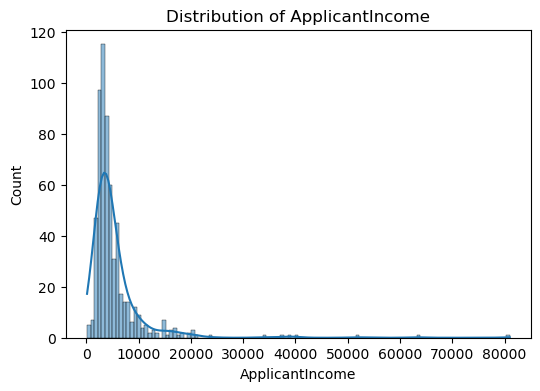

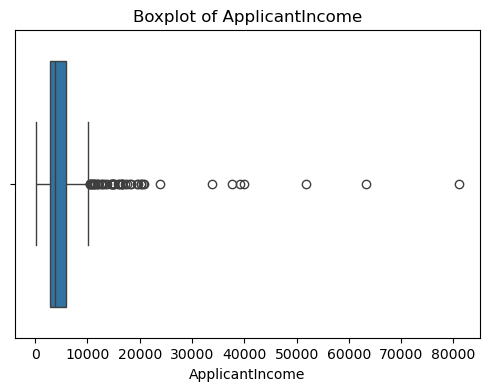

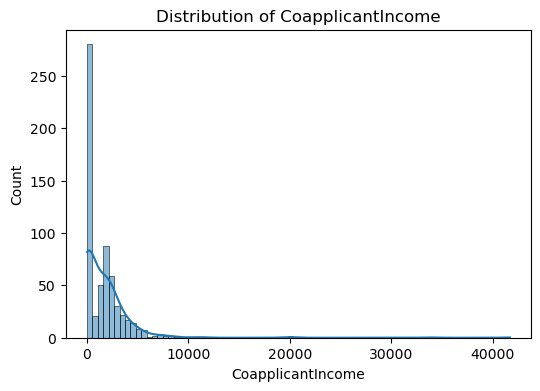

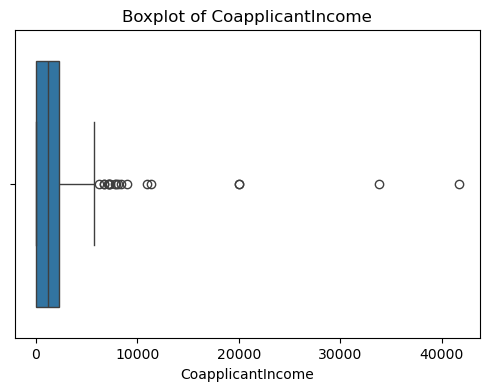

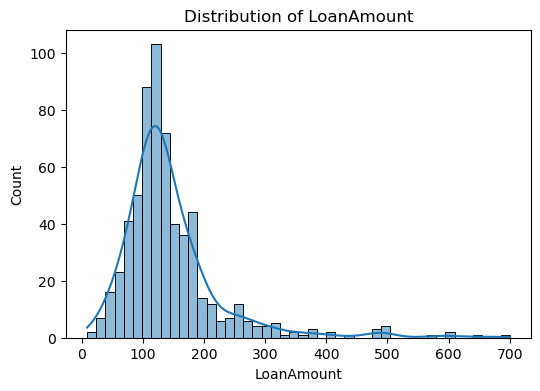

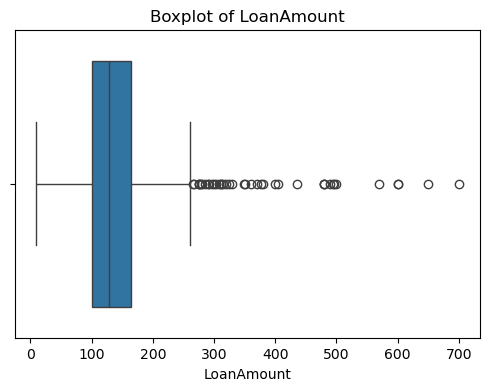

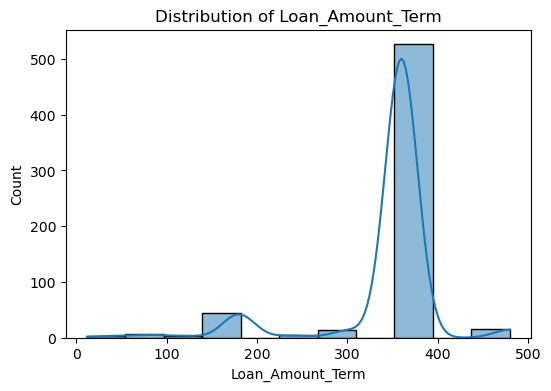

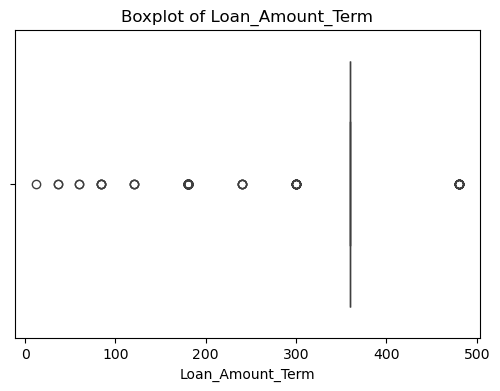

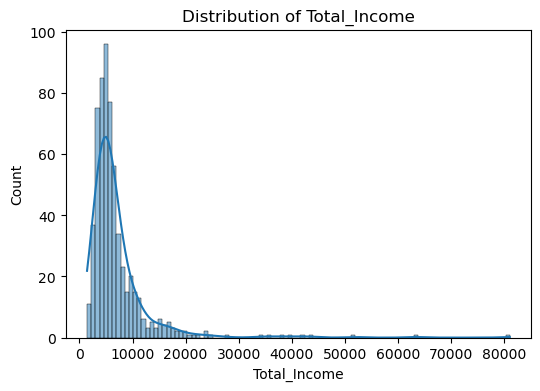

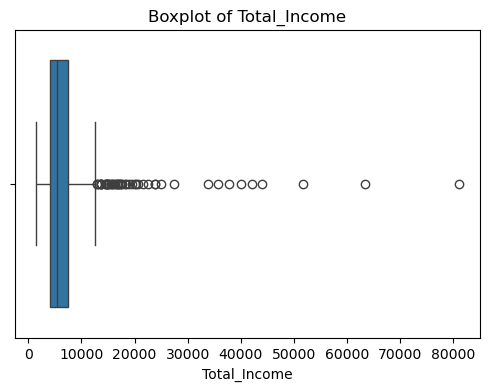

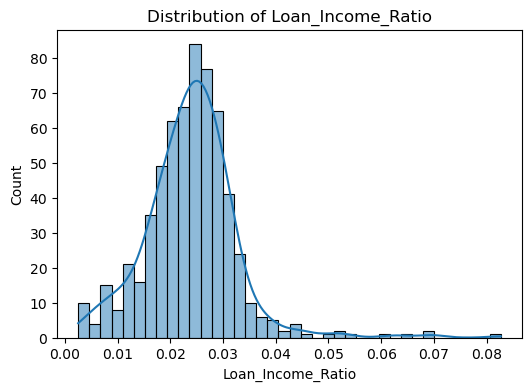

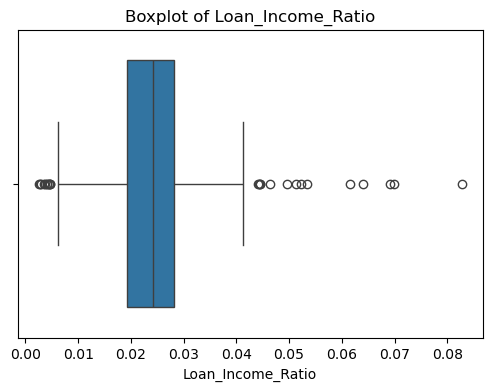

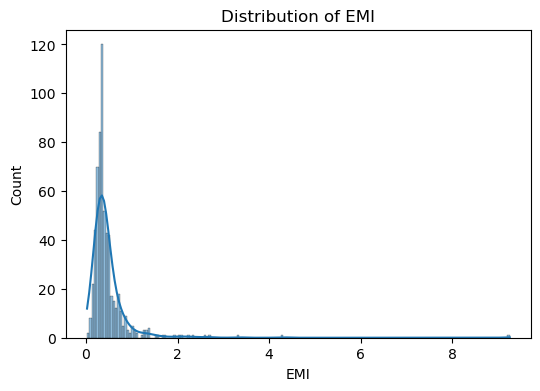

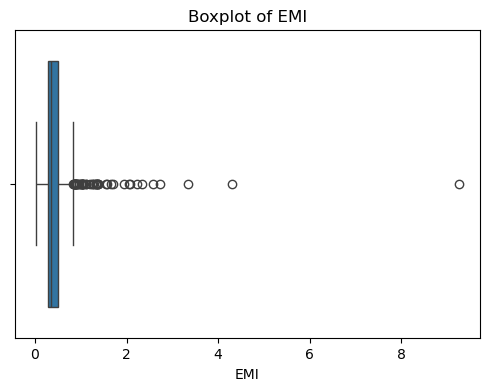

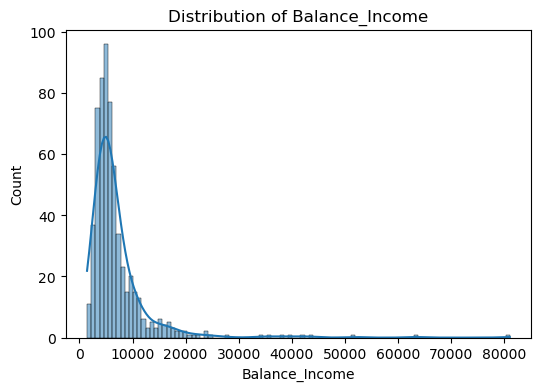

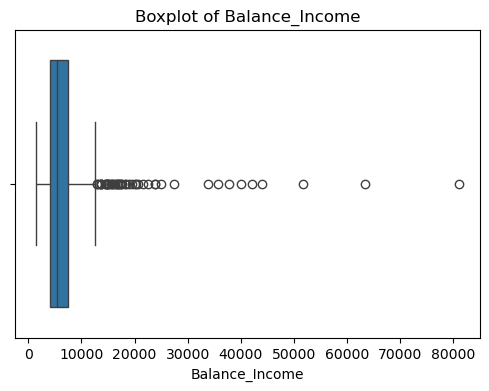

In [80]:
#Univariate Analysis
numerical_features = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Total_Income', 'Loan_Income_Ratio', 'EMI', 'Balance_Income']
for col in numerical_features:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()
    
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


In [81]:
# df['ApplicantIncome_bin'] = pd.cut(df['ApplicantIncome'], bins=[0, 2500, 4000, 6000, 81000],
#                                       labels=['Low', 'Average', 'High', 'Very high'])

# df['CoapplicantIncome_bin'] = pd.cut(df['CoapplicantIncome'], bins=[-0.1, 1000, 3000, 42000],
#                                         labels=['Low', 'Average', 'High'])

# df['LoanAmount_bin'] = pd.cut(df['LoanAmount'], bins=[0, 100, 200, 700],
#                                  labels=['Low', 'Average', 'High'])

# # Features to plot
# columns_to_plot = ['Gender', 'Married', 'Education', 'Self_Employed',
#                    'Property_Area', 'ApplicantIncome_bin', 'CoapplicantIncome_bin', 'LoanAmount_bin']

# # Plotting
# for col in numerical_features:
#     plt.figure(figsize=(6, 4))
#     ct = pd.crosstab(df[col], df['Loan_Status'])
#     ct.div(ct.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(6, 4), color=['blue', 'orange'])
#     plt.title(f'Loan Status by {col}')
#     plt.xlabel(col)
#     plt.ylabel('Proportion')
#     plt.legend(title='Loan_Status', loc='best')
#     plt.tight_layout()
#     plt.show()

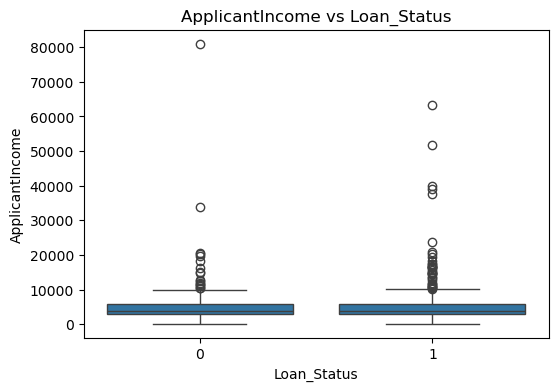

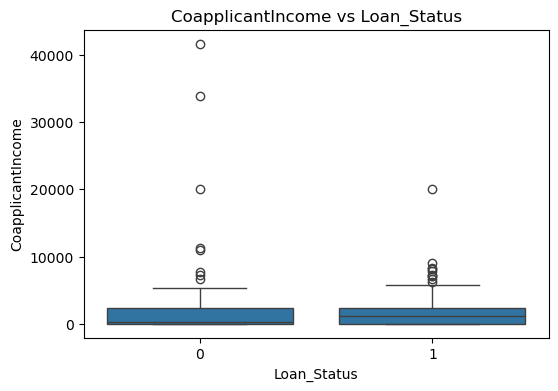

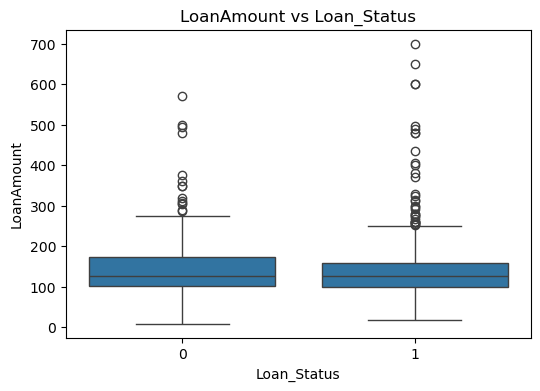

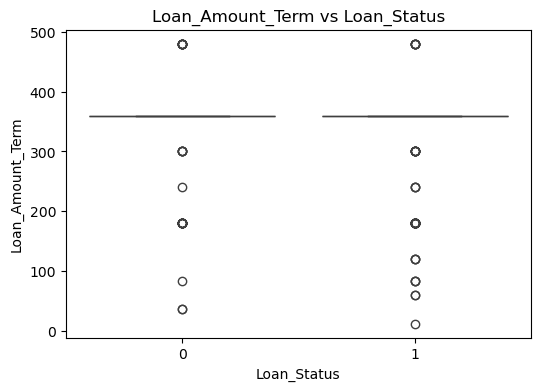

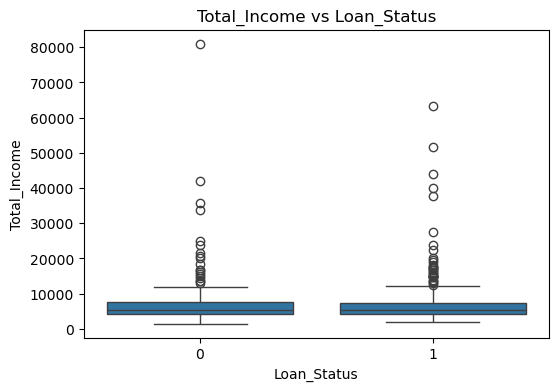

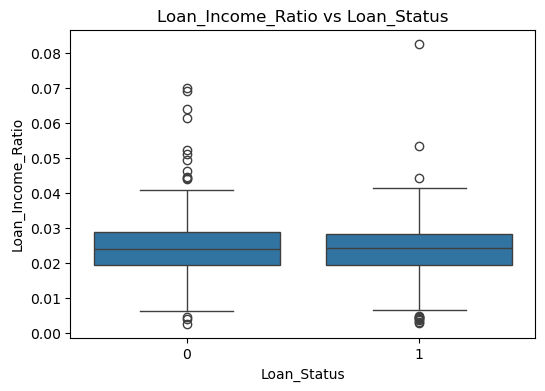

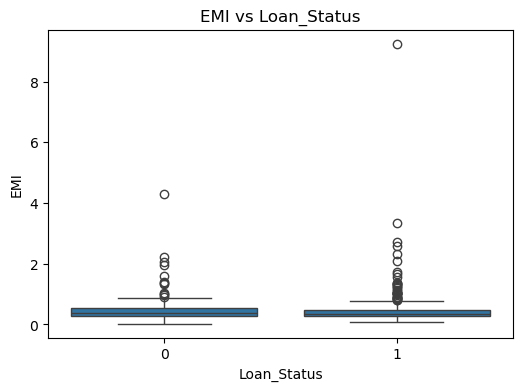

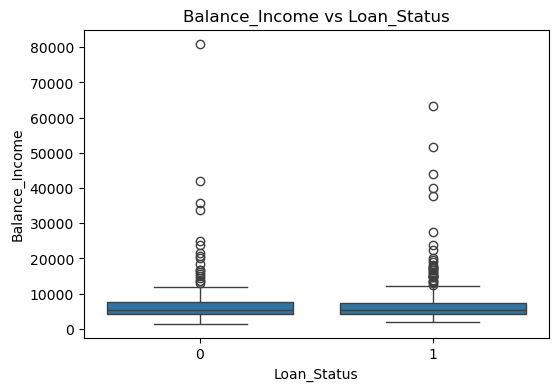

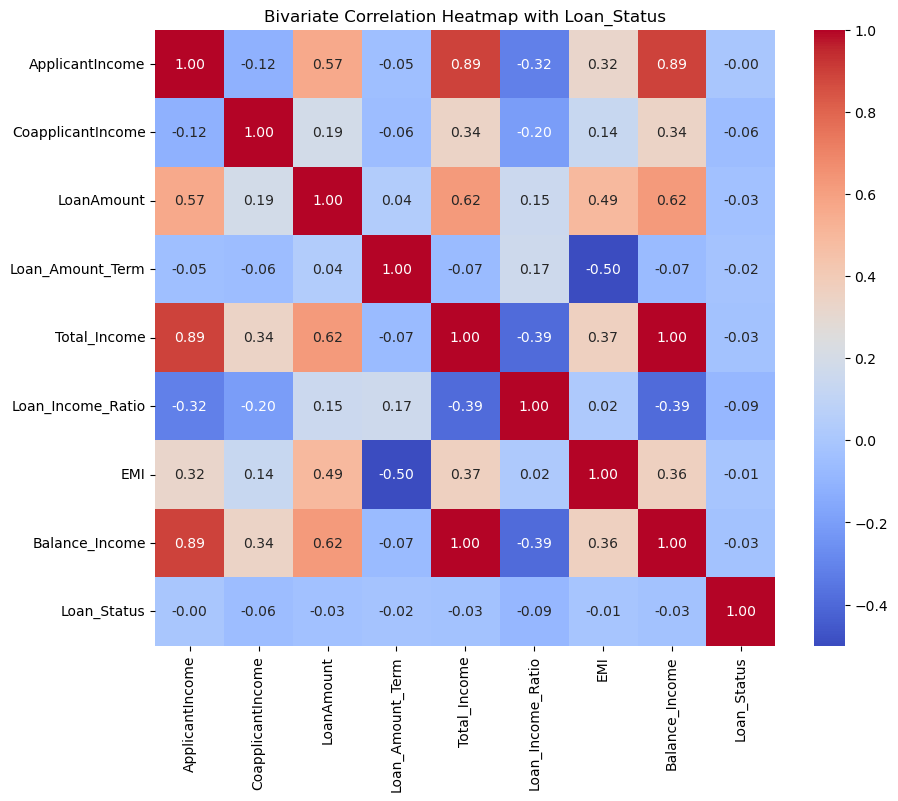

In [82]:
#Bivariate Analysis
# Boxplots: Numerical features vs Loan_Status
for col in numerical_features:
    plt.figure(figsize=(6,4))
    sns.boxplot(x='Loan_Status', y=col, data=df)
    plt.title(f'{col} vs Loan_Status')
    plt.show()

# Heatmap: Correlation matrix only for numerical features and Loan_Status
plt.figure(figsize=(10,8))
sns.heatmap(df[numerical_features + ['Loan_Status']].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Bivariate Correlation Heatmap with Loan_Status")
plt.show()

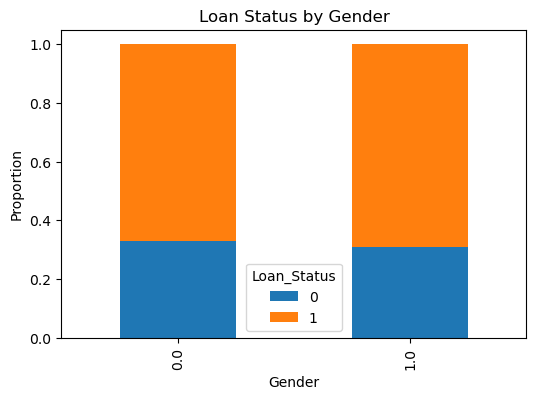

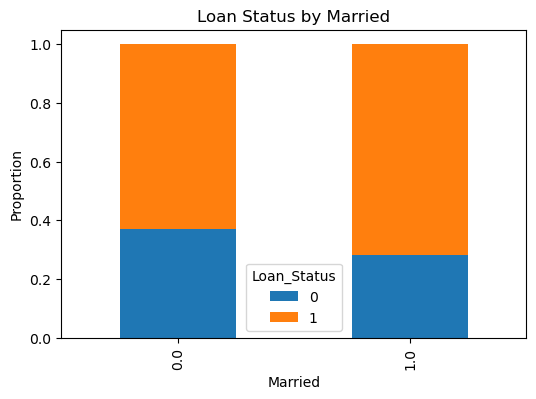

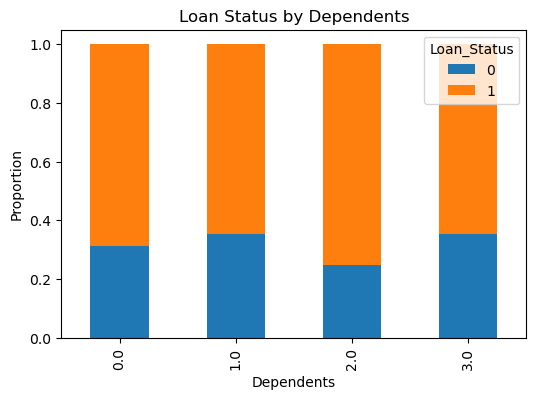

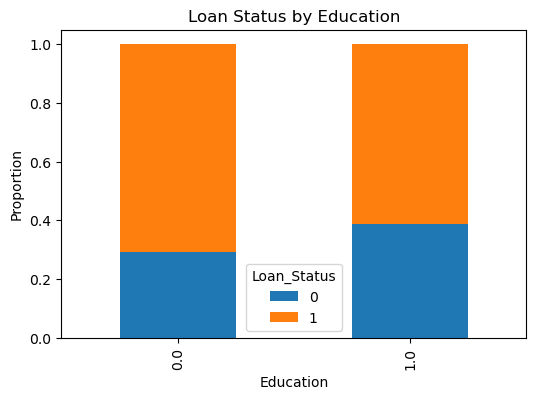

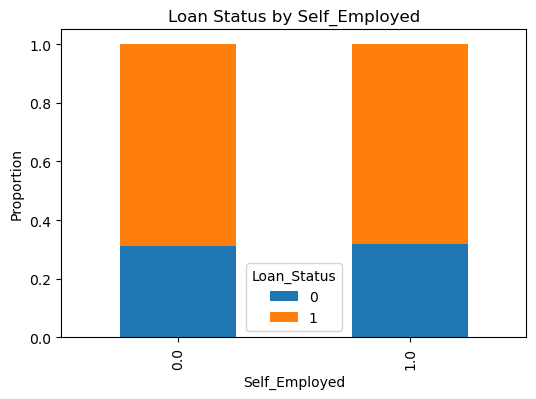

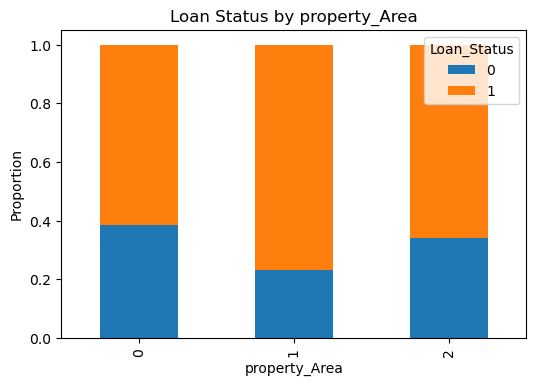

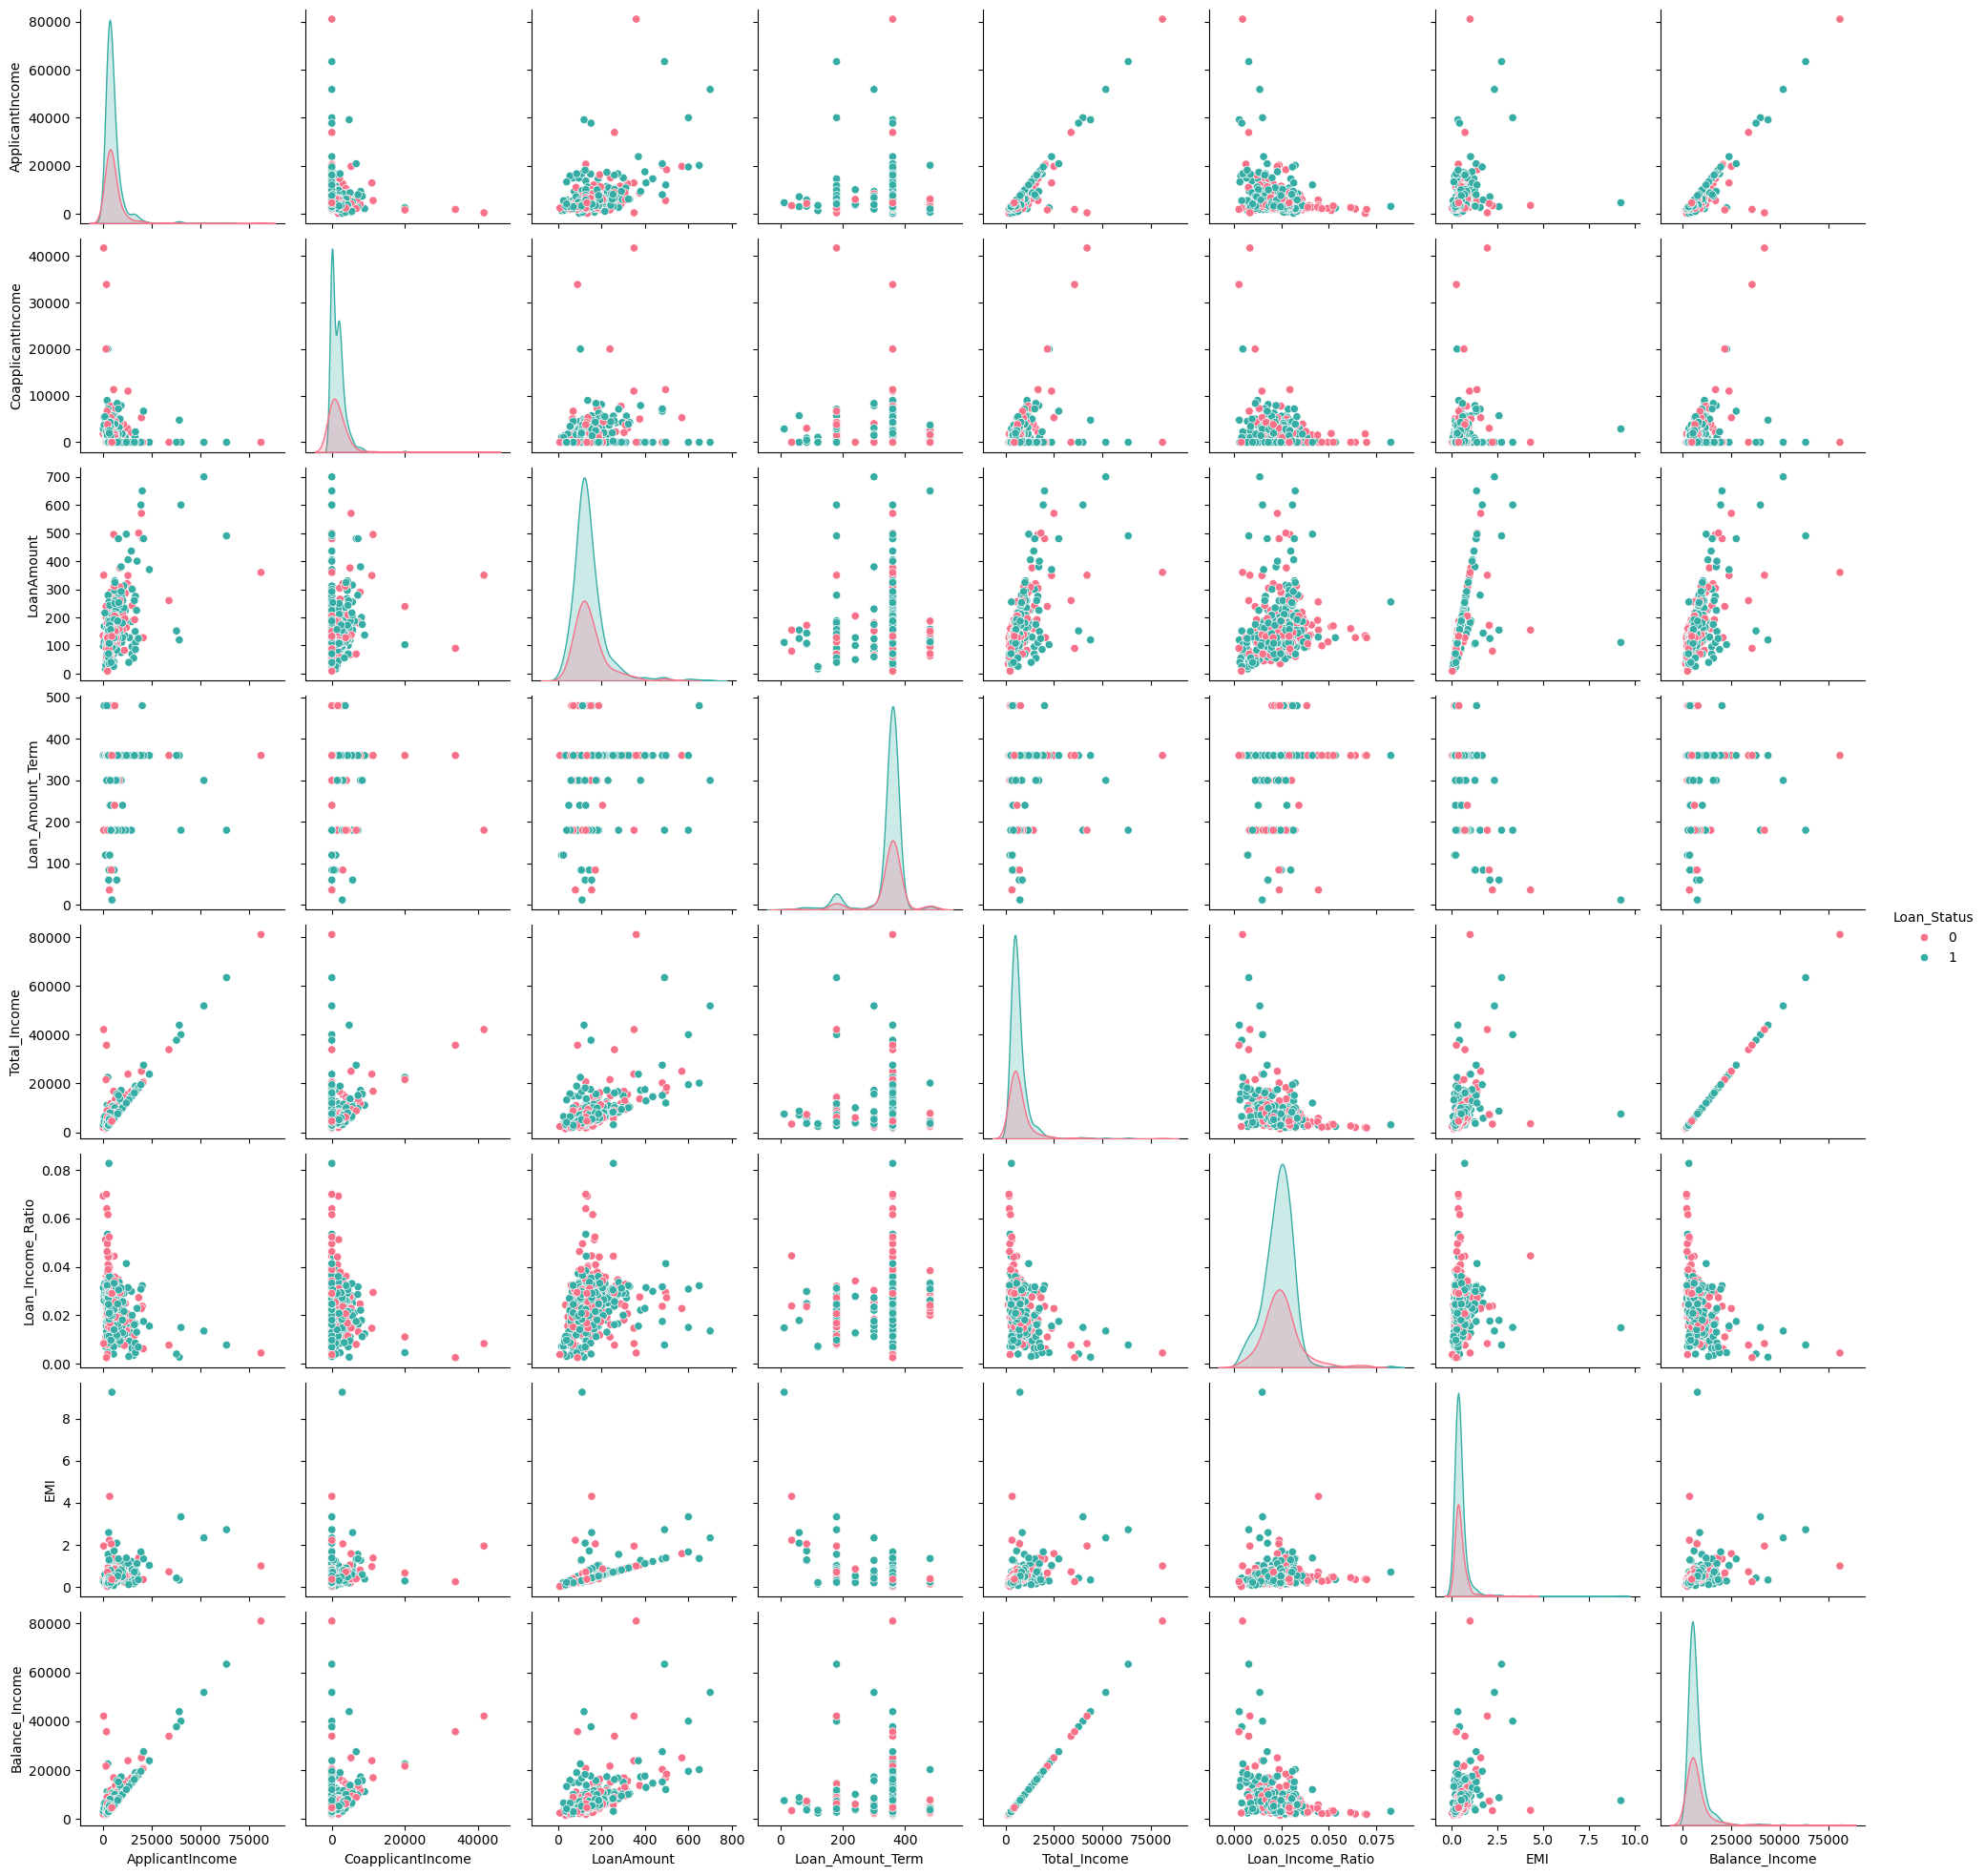

In [83]:
# Categorical vs Target
cat_features = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'property_Area']
for col in cat_features:
    cross_tab = pd.crosstab(df[col], df['Loan_Status'], normalize='index')
    cross_tab.plot(kind='bar', stacked=True, figsize=(6,4))
    plt.title(f'Loan Status by {col}')
    plt.ylabel('Proportion')
    plt.show()

# Numerical Pairplots
sns.pairplot(df[numerical_features + ['Loan_Status']], hue='Loan_Status', palette='husl')
plt.show()

In [84]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
vif_features = df[numerical_features].dropna()

# Standardize features for VIF
scaler = StandardScaler()
vif_scaled = scaler.fit_transform(vif_features)

# Calculating VIF
vif_data = pd.DataFrame()
vif_data["Feature"] = vif_features.columns
vif_data["VIF"] = [variance_inflation_factor(vif_scaled, i) for i in range(vif_scaled.shape[1])]

print("\nVariance Inflation Factor (VIF) to detect multicollinearity:\n")
print(vif_data)


Variance Inflation Factor (VIF) to detect multicollinearity:

             Feature       VIF
0    ApplicantIncome       inf
1  CoapplicantIncome       inf
2         LoanAmount  2.755540
3   Loan_Amount_Term  1.592442
4       Total_Income       inf
5  Loan_Income_Ratio  1.727438
6                EMI       inf
7     Balance_Income       inf


c:\Users\Richa\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


In [85]:
df.drop(columns=['Total_Income', 'CoapplicantIncome', 'Balance_Income', 'EMI'], inplace=True)

In [86]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,property_Area,Loan_Status,Rural,Semiurban,Urban,Female,Male,Loan_Income_Ratio
0,1002,1.0,0.0,0.0,0.0,0.0,5849.0,128.0,360.0,1.0,2,1,0,0,1,0,1,0.021884
1,1003,1.0,1.0,1.0,0.0,0.0,3806.0,128.0,360.0,1.0,0,0,1,0,0,0,1,0.024087
2,1005,1.0,1.0,0.0,0.0,1.0,3000.0,66.0,360.0,1.0,2,1,0,0,1,0,1,0.022000
3,1006,1.0,1.0,0.0,1.0,0.0,2583.0,120.0,360.0,1.0,2,1,0,0,1,0,1,0.024287
4,1008,1.0,0.0,0.0,0.0,0.0,6000.0,141.0,360.0,1.0,2,1,0,0,1,0,1,0.023500


In [87]:
df.drop(columns=['property_Area', 'Gender'], inplace=True)

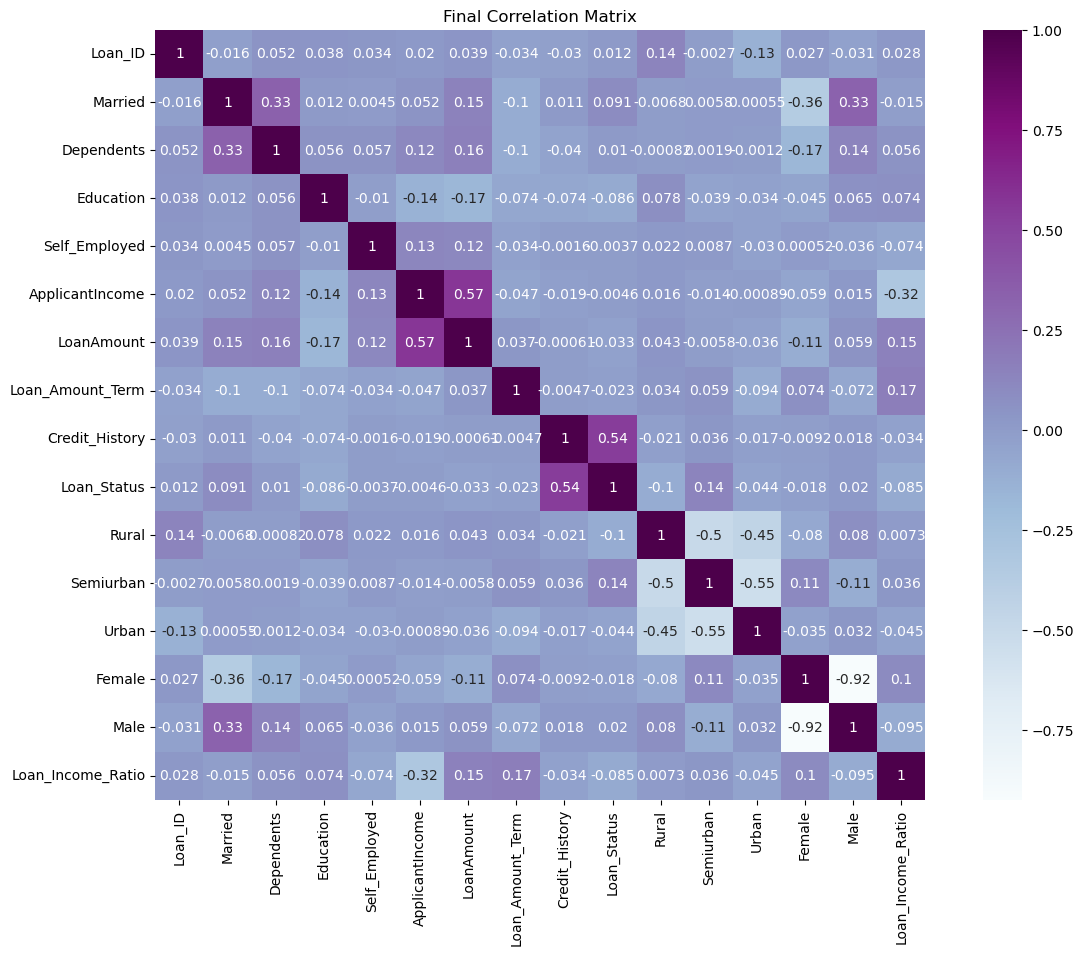


Features with correlation > 0.03 with Loan_Status:

Loan_Status          1.000000
Credit_History       0.540556
Semiurban            0.136540
Rural               -0.100694
Married              0.091478
Education           -0.085884
Loan_Income_Ratio   -0.085359
Urban               -0.043621
LoanAmount          -0.033214
Name: Loan_Status, dtype: float64


In [88]:
corr2 = df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr2, vmax=1, square=True, cmap="BuPu", annot=True)
plt.title("Final Correlation Matrix")
plt.show()

target_corr2 = corr2['Loan_Status'].dropna().sort_values(ascending=False)
target_corr2 = target_corr2[abs(target_corr2) > 0.03].sort_values(key=abs, ascending=False)
print("\nFeatures with correlation > 0.03 with Loan_Status:\n")
print(target_corr2)

In [89]:
selected_features = [
    'Credit_History', 'Semiurban', 'Rural', 'Married',
    'Education', 'Loan_Income_Ratio', 'Urban', 'LoanAmount'
]


In [90]:
x = df[selected_features]
y = df['Loan_Status']


In [91]:
x

,Credit_History,Semiurban,Rural,Married,Education,Loan_Income_Ratio,Urban,LoanAmount
0,1.0,0,0,0.0,0.0,0.021884,1,128.0
1,1.0,0,1,1.0,0.0,0.024087,0,128.0
2,1.0,0,0,1.0,0.0,0.022000,1,66.0
3,1.0,0,0,1.0,1.0,0.024287,1,120.0
4,1.0,0,0,0.0,0.0,0.023500,1,141.0
...,...,...,...,...,...,...,...,...
609,1.0,0,1,0.0,0.0,0.024483,0,71.0
610,1.0,0,1,1.0,0.0,0.009742,0,40.0
611,1.0,0,0,1.0,0.0,0.030438,1,253.0
612,1.0,0,0,1.0,0.0,0.024660,1,187.0


In [92]:
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int8